In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
np.random.seed(0)

In [4]:
n_samples = 1000

In [5]:
age = np.random.randint(1, 91, size=n_samples)
gender = np.random.randint(0, 2, size=n_samples)
pclass = np.random.randint(1, 4, size=n_samples)

In [6]:
survival_chance = (gender * 0.8 + pclass * 0.1) / 2
survived = np.random.binomial(1, survival_chance)

In [7]:
survived

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,

In [8]:
data = pd.DataFrame({'X0': np.ones(n_samples), 'Age': age, 'Gender': gender, 'Pclass': pclass, 'Survived': survived})


In [9]:
x = data[['X0', 'Age', 'Gender', 'Pclass']].values 
y = data['Survived'].values.reshape(-1, 1) 

In [10]:
x_train, x_test = x[:int(0.8 * n_samples)], x[int(0.2 * n_samples):]
y_train, y_test = y[:int(0.8 * n_samples)], y[int(0.2 * n_samples):]

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [12]:
def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

In [13]:
def costing(X, Y, theta):
    y_p = hypothesis(X, theta)
    loss = -1 * (np.mean(Y * np.log(y_p) + (1 - Y) * np.log(1 - y_p)))
    return loss

In [14]:
def gradient(X, Y, theta):
    y_p = hypothesis(X, theta)
    grad = np.dot(X.T , (Y - y_p))
    return grad / X.shape[0]

In [20]:
def gradient_descent(X, Y, learning_rate=0.1, epochs=100):
    m, n = X.shape
    theta = np.zeros((n, 1))
    cost_epoch = []
    for i in range(epochs):
        print('The algo is on epoch no : ',i)
        loss = costing(X, Y, theta)
        grad = gradient(X, Y, theta)
        cost_epoch.append(loss)
        theta = theta + learning_rate * grad
    return theta, cost_epoch

In [21]:
theta, cost = gradient_descent(x_train, y_train, learning_rate=0.1, epochs=10000)

The algo is on epoch no :  0
The algo is on epoch no :  1
The algo is on epoch no :  2
The algo is on epoch no :  3
The algo is on epoch no :  4
The algo is on epoch no :  5
The algo is on epoch no :  6
The algo is on epoch no :  7
The algo is on epoch no :  8
The algo is on epoch no :  9
The algo is on epoch no :  10
The algo is on epoch no :  11
The algo is on epoch no :  12
The algo is on epoch no :  13
The algo is on epoch no :  14
The algo is on epoch no :  15
The algo is on epoch no :  16
The algo is on epoch no :  17
The algo is on epoch no :  18
The algo is on epoch no :  19
The algo is on epoch no :  20
The algo is on epoch no :  21
The algo is on epoch no :  22
The algo is on epoch no :  23
The algo is on epoch no :  24
The algo is on epoch no :  25
The algo is on epoch no :  26
The algo is on epoch no :  27
The algo is on epoch no :  28
The algo is on epoch no :  29
The algo is on epoch no :  30
The algo is on epoch no :  31
The algo is on epoch no :  32
The algo is on epoch

/var/folders/2d/hbs91tgs1x5fm93l99fm4blw0000gn/T/ipykernel_55064/3802631697.py:3: RuntimeWarning: divide by zero encountered in log
  loss = -1 * (np.mean(Y * np.log(y_p) + (1 - Y) * np.log(1 - y_p)))
/var/folders/2d/hbs91tgs1x5fm93l99fm4blw0000gn/T/ipykernel_55064/3802631697.py:3: RuntimeWarning: invalid value encountered in multiply
  loss = -1 * (np.mean(Y * np.log(y_p) + (1 - Y) * np.log(1 - y_p)))


The algo is on epoch no :  348
The algo is on epoch no :  349
The algo is on epoch no :  350
The algo is on epoch no :  351
The algo is on epoch no :  352
The algo is on epoch no :  353
The algo is on epoch no :  354
The algo is on epoch no :  355
The algo is on epoch no :  356
The algo is on epoch no :  357
The algo is on epoch no :  358
The algo is on epoch no :  359
The algo is on epoch no :  360
The algo is on epoch no :  361
The algo is on epoch no :  362
The algo is on epoch no :  363
The algo is on epoch no :  364
The algo is on epoch no :  365
The algo is on epoch no :  366
The algo is on epoch no :  367
The algo is on epoch no :  368
The algo is on epoch no :  369
The algo is on epoch no :  370
The algo is on epoch no :  371
The algo is on epoch no :  372
The algo is on epoch no :  373
The algo is on epoch no :  374
The algo is on epoch no :  375
The algo is on epoch no :  376
The algo is on epoch no :  377
The algo is on epoch no :  378
The algo is on epoch no :  379
The algo

In [22]:
theta

array([[-13.07902591],
       [ -0.15039712],
       [ 23.70050935],
       [  3.64441572]])

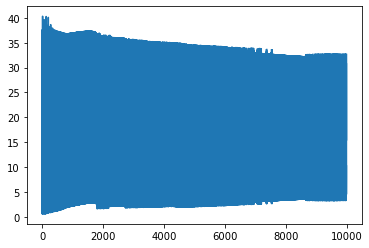

In [24]:
plt.plot(cost)

In [25]:
def predict(X, theta):
    
    y_p = hypothesis(X, theta)
    
    y_pred = []

    for i in y_p:
        
        if i >= 0.5:
            y_pred.append(1)
            
        else:
            y_pred.append(0)
    y_pred = np.array(y_pred)        
    
    return y_pred

In [26]:
pred = predict(x_test, theta)

In [27]:
pred = pred.reshape((-1, 1))

In [28]:
pred.shape

(800, 1)

In [29]:
def accuracy(pred, label):
    
    temp = 0
    
    for i in range(pred.shape[0]):
        if pred[i]==label[i]:
            
            temp += 1
        else:
            pass
    print("Accuracy = ", (temp/pred.shape[0])*100, "%")    

In [30]:
accuracy(pred, y_test)

Accuracy =  68.125 %


In [31]:
pred

array([[1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    